In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df=df.fillna('')

In [9]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

# Data Visualization

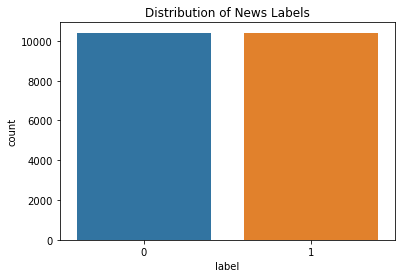

In [10]:
# Visualize the distribution of target labels
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='label', data=df)
plt.title('Distribution of News Labels')
plt.show()

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msaic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

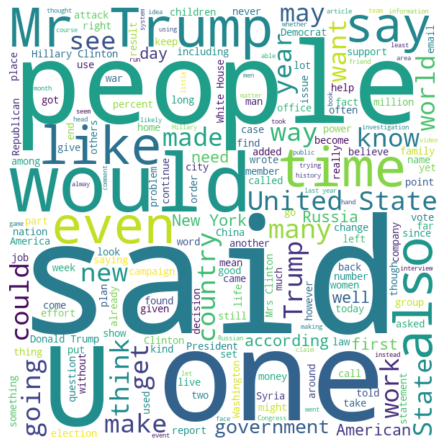

In [18]:
#WordCloud Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['text'].astype(str))

# Define stopwords if not already defined
stopwords = set(stopwords.words('english'))

# Generate the WordCloud
wordcloud = WordCloud(width=600, height=600, background_color='white', stopwords=stopwords).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Display the WordCloud
plt.show()


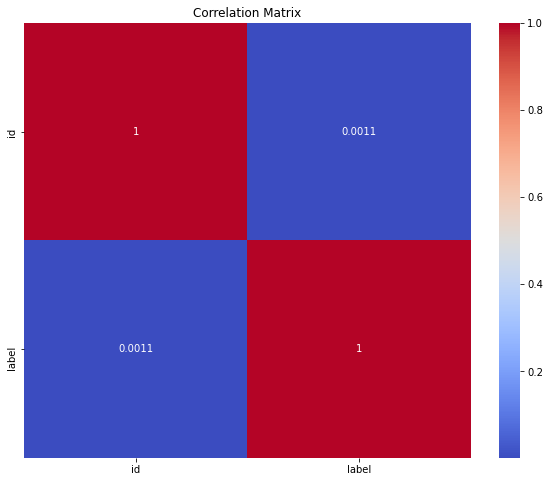

In [60]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Pre-processing

In [9]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
df=df.drop(['id', 'title', 'author'], axis=1)

In [11]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


# Stemming: 
#Stemming is the process of reducing a word to its Root word

#example: actor, actress, acting --> act

In [12]:
from nltk.corpus import stopwords

In [13]:
from nltk.stem.porter import PorterStemmer

In [14]:
import re

In [15]:
port_stem=PorterStemmer()

In [16]:
port_stem

<PorterStemmer>

In [18]:
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con

In [20]:
df['text']= df['text'].apply(stemming)

In [21]:
x=df['text']

In [23]:
print(x)

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object


In [24]:
y=df['label']

In [25]:
print(y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [26]:
x.shape

(20800,)

In [27]:
y.shape

(20800,)

# Splitting the dataset to training & test data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

# converting the textual data to numerical data

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vect=TfidfVectorizer()

In [32]:
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [33]:
x_test.shape

(4160, 97069)

# Training the Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model=DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
prediction=model.predict(x_test)

In [38]:
prediction

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

# Evaluation Accuracy score

In [39]:
model.score(x_test, y_test)

0.8730769230769231

Text(39.5, 0.5, 'Actual Values')

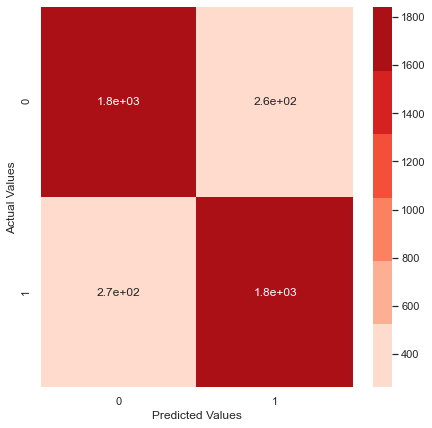

In [61]:
import seaborn as sns
from sklearn import metrics
sns.set(rc = {'figure.figsize':(7,7)})
colormap = sns.color_palette("Reds")
p = sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True, cmap=colormap)

p.set_xlabel('Predicted Values')
p.set_ylabel('Actual Values')

# To save the trained vectorizer and model objects to disk 

In [40]:
import pickle

In [41]:
pickle.dump(vect, open('vector.pkl', 'wb'))

In [42]:
pickle.dump(model, open('model.pkl', 'wb'))

In [43]:
vector_form=pickle.load(open('vector.pkl', 'rb'))

In [44]:
load_model=pickle.load(open('model.pkl', 'rb'))

# Making a Predictive System

In [45]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [46]:
val=fake_news("""In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """)

In [47]:
if val==[0]:
    print('reliable')
else:
    print('unreliable')

reliable
